In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# 1a

In [6]:
def tau(r,u):
    return np.log(1/u)/r

In [7]:
def expDistr(x,r):
    return r*np.exp(-r*x)

In [8]:
r =1
xs = np.linspace(0,10,100)


/home/mauro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


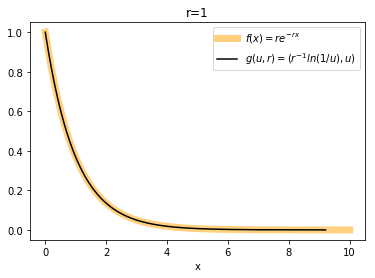

In [10]:
plt.plot(xs,expDistr(xs,r),c='orange',lw=7,alpha=0.5,label=r'$f(x)=re^{-rx}$')
u = np.linspace(0,1,10000)
plt.plot(tau(r,u),u,c='black',label = r"$g(u,r) = (r^{-1}ln(1/u),u)$")
plt.title("r=1")
plt.xlabel("x")

plt.legend()
plt.savefig('punto1a.png')

# 1b

In [12]:
randoms= np.random.random(500)
vals = tau(10,randoms)

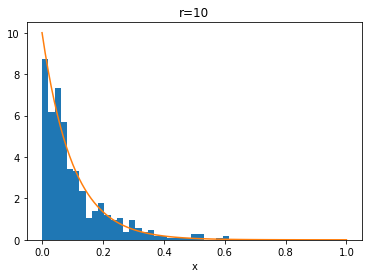

In [19]:
plt.hist(vals,bins=30,density=True)
plt.plot(np.linspace(0,1,100),expDistr(np.linspace(0,1,100),10))
plt.xlabel("x")
plt.title("r=10")
plt.savefig('punto1b.png')

# 1c

In [14]:
r1 = np.random.random(10000)
r2 = np.random.random(10000)

vals1 = tau(10,r1)
vals2 = tau(5,r2)

# plt.hist(r1)


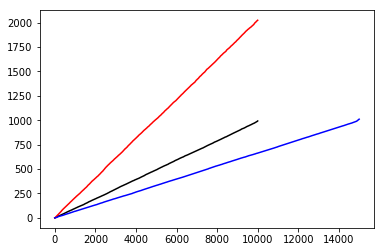

In [15]:
# both = np.concatenate([vals1,vals2])
c1 = np.cumsum(vals1)
c2 = np.cumsum(vals2)
plt.plot(c1,color='black')
plt.plot(c2,color='red')

both1 = np.concatenate([c2,c1])

both1.sort()
both1= both1[:-5000]
plt.plot((both1),color='blue')
both = []
for i in range(len(both1)-1):
    both.append(both1[i+1]-both1[i])
botht= np.array(both)


(array([1.1365e+04, 2.7270e+03, 6.8400e+02, 1.6200e+02, 4.7000e+01,
        8.0000e+00, 4.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.64887979e-06, 9.44060898e-02, 1.88810531e-01, 2.83214972e-01,
        3.77619413e-01, 4.72023854e-01, 5.66428295e-01, 6.60832735e-01,
        7.55237176e-01, 8.49641617e-01, 9.44046058e-01]),
 <a list of 10 Patch objects>)

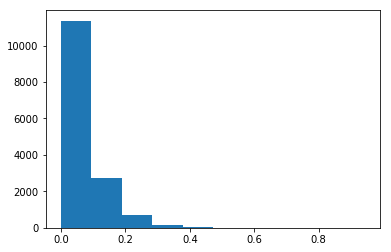

In [16]:
both = []
for i in range(len(both1)-1):
    both.append(both1[i+1]-both1[i])
# print(l[-1])
# print(r[-1])
# both = r-l
plt.hist(both)

0.0992093459850962 0.20239257812499928 0.06737753208189037


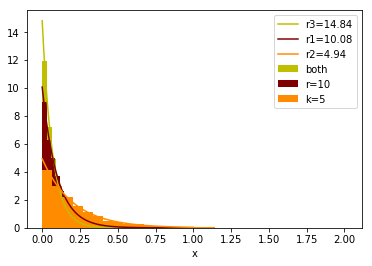

In [21]:

r1 = expon.fit(vals1,floc=0)[1]
r2 = expon.fit(vals2,floc=0)[1]
r3 = expon.fit(both,floc=0)[1]

print(r1,r2,r3)

xs = np.linspace(0.0001,1,100)


plt.hist(both,bins=30,label='both',density=True,color='y')
plt.plot(xs,expDistr(xs,r3**-1),label="r3={:.2f}".format(r3**-1),color='y')

plt.hist(vals1,bins=30,label='r=10',density=True,color='maroon')
plt.plot(xs,expDistr(xs,r1**-1),label="r1={:.2f}".format(r1**-1),color='maroon')
plt.hist(vals2,bins=30,label='k=5',density=True,color='darkorange')
plt.plot(xs,expDistr(xs,r2**-1),label="r2={:.2f}".format(r2**-1),color='darkorange')


# print(both)

plt.legend()
# plt.close()
plt.xlabel('x')
plt.savefig('punto1c.png')

# 1d

In [50]:
r = 15

# vals1 = tau(10,r1)
# vals2 = tau(5,r2)
valsA = []
valsB = []
valsBoth = []

In [51]:
for i in range(5000):
    rand = np.random.random()
    
    time = tau(r,rand)
    
    rand2 = np.random.random()
    
    if(rand2<=1/3):
        valsB.append(time)
    else:
        valsA.append(time)
    valsBoth.append(time)

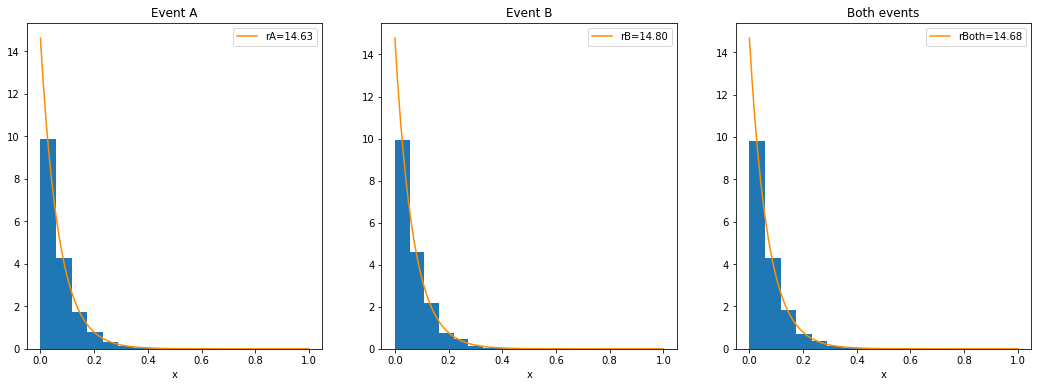

In [55]:

rA = expon.fit(valsA,floc=0)[1]
rB = expon.fit(valsB,floc=0)[1]
rBoth = expon.fit(valsBoth,floc=0)[1]


plt.figure(figsize=(18,6))
xs = np.linspace(0.0001,1,100)
plt.subplot(1, 3, 1)
plt.plot(xs,expDistr(xs,rA**-1),label="rA={:.2f}".format(rA**-1),color='darkorange')
plt.hist(valsA,density=True)
plt.legend()
plt.title('Event A')
plt.xlabel('x')


plt.subplot(1, 3, 2)
plt.plot(xs,expDistr(xs,rB**-1),label="rB={:.2f}".format(rB**-1),color='darkorange')
plt.hist(valsB,density=True)
plt.legend()
plt.title('Event B')
plt.xlabel('x')

plt.subplot(1, 3, 3)
plt.plot(xs,expDistr(xs,rBoth**-1),label="rBoth={:.2f}".format(rBoth**-1),color='darkorange')
plt.hist(valsBoth,density=True)
plt.title('Both events')
plt.xlabel('x')

plt.legend()
plt.savefig('punto1d.png')